In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import itertools
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from xgboost import XGBRegressor


import os

### Read and Combine the txt files

In [2]:
# Path to the folder containing the text files
folder_path = r"C:/Users/odoms001/Downloads/IMA_Project/CS_Finance_Data"

# List all files in the folder
file_list = [f for f in os.listdir(folder_path) if f.endswith('.txt')] ## List Comprehension

# Initialize an empty list to store DataFrames
dataframes = []

# Read each file and append the DataFrame to the list
for file_name in file_list:
    file_path = os.path.join(folder_path, file_name)
    df = pd.read_csv(file_path, sep='^', header=0, engine='python', encoding='latin1', on_bad_lines='skip')
    dataframes.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

# Display the first few rows of the combined DataFrame
combined_df.head()

,RSSD9001,RSSD9999,RSSD9007,RSSD9008,RSSD9132,RSSD9032,RSSD9146,BHBC3368,BHBC3402,BHBC3516,...,BHCANC99,BHCKFT42,BHCKFT43,BHCKFT44,BHSPFT42,BHSPFT43,BHSPFT44,BHSPMZ36,BHSPNK60,BHCKMG95
0,1020180,20040331,20020401,20040822,551111,9,11.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1020201,20040331,20001028,20051230,551111,2,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1020340,20040331,20040301,20040531,551111,7,29.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1020395,20040331,20040211,20081230,551111,6,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1020582,20040331,19980101,20060228,551111,7,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Subset some columns:

In [3]:
smalldf = combined_df[['RSSD9001','RSSD9017', 'RSSD9032', 'RSSD9146', 'RSSD9999', 'BHCK4107', 'BHCK2170']]
smalldf.head()

,RSSD9001,RSSD9017,RSSD9032,RSSD9146,RSSD9999,BHCK4107,BHCK2170
0,1020180,BREMER FINANCIAL CORPORATION,9,11.0,20040331,68233.0,5721282.0
1,1020201,HSBC USA INC.,2,1.0,20040331,883035.0,102501934.0
2,1020340,"HARRIS BANKCORP, INC.",7,29.0,20040331,276513.0,32344528.0
3,1020395,SOUTHERN NATIONAL CORPORATION,6,1.0,20040331,2980.0,217529.0
4,1020582,"WCN BANCORP, INC.",7,1.0,20040331,2692.0,240470.0


In [4]:
name_dict = {'RSSD9001':'RSSD ID',
             'RSSD9017':'Firm Legal Name',
             'RSSD9032':'FR District Code',
             'RSSD9146':'Bank Count',
             'RSSD9999':'Reporting Date',
             'BHCK4107':'Interest Income',
             'BHCK2170':'Total Assets',
             }
smalldf = smalldf.rename(columns = name_dict)
print(smalldf.shape)
smalldf.head()

(243757, 7)


,RSSD ID,Firm Legal Name,FR District Code,Bank Count,Reporting Date,Interest Income,Total Assets
0,1020180,BREMER FINANCIAL CORPORATION,9,11.0,20040331,68233.0,5721282.0
1,1020201,HSBC USA INC.,2,1.0,20040331,883035.0,102501934.0
2,1020340,"HARRIS BANKCORP, INC.",7,29.0,20040331,276513.0,32344528.0
3,1020395,SOUTHERN NATIONAL CORPORATION,6,1.0,20040331,2980.0,217529.0
4,1020582,"WCN BANCORP, INC.",7,1.0,20040331,2692.0,240470.0


In [5]:
smalldf['Reporting Date'] = pd.to_datetime(smalldf['Reporting Date'], format = "%Y%m%d")

In [6]:
smalldf.shape

(243757, 7)

### Define Quarters and Years


In [7]:
# Define Quarter

smalldf['Quarter'] = smalldf['Reporting Date'].dt.quarter
# smalldf.head()

In [8]:
# Define Year

smalldf['Year'] = smalldf['Reporting Date'].dt.year
smalldf.head()

,RSSD ID,Firm Legal Name,FR District Code,Bank Count,Reporting Date,Interest Income,Total Assets,Quarter,Year
0,1020180,BREMER FINANCIAL CORPORATION,9,11.0,2004-03-31,68233.0,5721282.0,1,2004
1,1020201,HSBC USA INC.,2,1.0,2004-03-31,883035.0,102501934.0,1,2004
2,1020340,"HARRIS BANKCORP, INC.",7,29.0,2004-03-31,276513.0,32344528.0,1,2004
3,1020395,SOUTHERN NATIONAL CORPORATION,6,1.0,2004-03-31,2980.0,217529.0,1,2004
4,1020582,"WCN BANCORP, INC.",7,1.0,2004-03-31,2692.0,240470.0,1,2004


## Quaterization

In [9]:
def quarterize(df, cols_to_process, dt_column):

  # indices is considered to be default
    fq_ids = df[(df[dt_column].dt.month == 3) & (df[dt_column].dt.day == 31)].index
    for col in cols_to_process:

        df[f"Q{col}"] = df[col].diff()
        df.loc[fq_ids, f"Q{col}"] = df.loc[fq_ids, col]
    return df

In [10]:
ls_dfs = []
for bank in smalldf['RSSD ID'].unique():
    OneBank = smalldf[smalldf["RSSD ID"] == bank].sort_values(by=['Reporting Date'])
    tmp_df = quarterize(OneBank, ["Interest Income"], dt_column="Reporting Date")
    ls_dfs.append(tmp_df)

Quarterized_dfs = pd.concat(ls_dfs, ignore_index=True)
Quarterized_dfs.head()

,RSSD ID,Firm Legal Name,FR District Code,Bank Count,Reporting Date,Interest Income,Total Assets,Quarter,Year,QInterest Income
0,1020180,BREMER FINANCIAL CORPORATION,9,11.0,2004-03-31,68233.0,5721282.0,1,2004,68233.0
1,1020180,BREMER FINANCIAL CORPORATION,9,11.0,2004-06-30,138086.0,5870480.0,2,2004,69853.0
2,1020180,BREMER FINANCIAL CORPORATION,9,10.0,2004-09-30,212489.0,5963700.0,3,2004,74403.0
3,1020180,BREMER FINANCIAL CORPORATION,9,10.0,2004-12-31,291916.0,6141519.0,4,2004,79427.0
4,1020180,BREMER FINANCIAL CORPORATION,9,10.0,2005-03-31,81656.0,6230236.0,1,2005,81656.0


### Normalization

In [11]:
# Normalize Components
Quarterized_dfs['Normalized Interest Income per Quarter'] = Quarterized_dfs['QInterest Income']/Quarterized_dfs['Total Assets']

# Quarterized_dfs['Normalized Net Interest Income per Quarter'] = Quarterized_dfs['QNet Interest Income']/Quarterized_dfs['Total Assets']

Quarterized_dfs.head()

,RSSD ID,Firm Legal Name,FR District Code,Bank Count,Reporting Date,Interest Income,Total Assets,Quarter,Year,QInterest Income,Normalized Interest Income per Quarter
0,1020180,BREMER FINANCIAL CORPORATION,9,11.0,2004-03-31,68233.0,5721282.0,1,2004,68233.0,0.011926
1,1020180,BREMER FINANCIAL CORPORATION,9,11.0,2004-06-30,138086.0,5870480.0,2,2004,69853.0,0.011899
2,1020180,BREMER FINANCIAL CORPORATION,9,10.0,2004-09-30,212489.0,5963700.0,3,2004,74403.0,0.012476
3,1020180,BREMER FINANCIAL CORPORATION,9,10.0,2004-12-31,291916.0,6141519.0,4,2004,79427.0,0.012933
4,1020180,BREMER FINANCIAL CORPORATION,9,10.0,2005-03-31,81656.0,6230236.0,1,2005,81656.0,0.013106


In [12]:
Quarterized_dfs.shape

(243757, 11)

# Considering Macroeconomic Variables

### 1. GDP AND UNEMPLOYMENT RATE

In [13]:
gdp_df = pd.read_csv(r"/Users/odoms001/Downloads/IMA_Project/CS_Finance_Data/MacroEconomic_Variables/GDP.csv", parse_dates=True)
gdp_df['DATE'] = pd.to_datetime(gdp_df['DATE'])
print(gdp_df.shape)
gdp_df.head()

(81, 2)


,DATE,GDP
0,2004-01-01,11923.447
1,2004-04-01,12112.815
2,2004-07-01,12305.307
3,2004-10-01,12527.214
4,2005-01-01,12767.286


In [14]:
uner_df = pd.read_csv(r"/Users/odoms001/Downloads/IMA_Project/CS_Finance_Data/MacroEconomic_Variables/UNRATE.csv")
uner_df['DATE'] = pd.to_datetime(uner_df['DATE'])
print(uner_df.shape)
uner_df.head()

(82, 2)


,DATE,UNRATE
0,2004-01-01,5.700000
1,2004-04-01,5.600000
2,2004-07-01,5.433333
3,2004-10-01,5.433333
4,2005-01-01,5.300000


In [15]:
gdp_growth = pd.read_csv(r"/Users/odoms001/Downloads/IMA_Project/CS_Finance_Data/MacroEconomic_Variables/GDP_growth_2004-2024.csv")
gdp_growth['DATE'] = pd.to_datetime(gdp_growth['DATE'])
print(gdp_growth.shape)
gdp_growth.head()

(81, 2)


,DATE,GDP growth
0,2004-01-01,2.3
1,2004-04-01,3.1
2,2004-07-01,3.8
3,2004-10-01,4.1
4,2005-01-01,4.5


In [16]:
# Combine GDP and Unemployment rate
df_gdp_uner = pd.merge(gdp_df, uner_df, on='DATE')
# print(df_gdp_uner.shape)
# df_gdp_uner.head()

In [17]:
# Combine with GDP growth
df_gdp_uner = pd.merge(gdp_growth, df_gdp_uner, on = 'DATE')
print(df_gdp_uner.shape)
df_gdp_uner.head()

(81, 4)


,DATE,GDP growth,GDP,UNRATE
0,2004-01-01,2.3,11923.447,5.700000
1,2004-04-01,3.1,12112.815,5.600000
2,2004-07-01,3.8,12305.307,5.433333
3,2004-10-01,4.1,12527.214,5.433333
4,2005-01-01,4.5,12767.286,5.300000


In [18]:
df_gdp_uner.rename(columns={'DATE': 'date'}, inplace=True)

In [19]:
def update_quart_enddate_shift(df):
    # Define a dictionary to map the month to the new date
    quarter_end_dates = {1: (12, 31), 4: (3, 31), 7: (6, 30), 10: (9, 30)}

    # Apply the mapping to update the dates
    for month, (new_month, new_day) in quarter_end_dates.items():
        df.loc[df['date'].dt.month == month, 'date'] = df['date'].apply(
            lambda x: x.replace(month=new_month, day=new_day) if x.month == month else x
        )

    # offset the years by 1 for those whose month is december
    tmp_ids = df[df["date"].dt.month == 12].index
    df.loc[tmp_ids, "date"] = df.loc[tmp_ids, "date"] - pd.DateOffset(years=1)

    # drop the first row df_gdp_uner
    df.drop(df.index[0], inplace=True)
    df.reset_index(drop=True, inplace=True)

    return df

In [20]:
df_gdp_uner =  update_quart_enddate_shift(df_gdp_uner)
df_gdp_uner.head()

,date,GDP growth,GDP,UNRATE
0,2004-03-31,3.1,12112.815,5.600000
1,2004-06-30,3.8,12305.307,5.433333
2,2004-09-30,4.1,12527.214,5.433333
3,2004-12-31,4.5,12767.286,5.300000
4,2005-03-31,2.0,12922.656,5.100000


### 2. US Department of Treasury Dataset -  Yield Curve Rates from 2004 - 2024

In [21]:
rates_df = pd.read_csv(r"/Users/odoms001/Downloads/IMA_Project/CS_Finance_Data/MacroEconomic_Variables/yield-curve-rates-2004-2024.csv", encoding='latin1')
rates_df.head()

,Date,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,07/15/2024,5.48,5.51,5.43,5.40,5.23,4.85,4.44,4.23,4.13,4.16,4.23,4.56,4.46
1,07/12/2024,5.47,5.52,5.43,5.41,5.23,4.87,4.45,4.22,4.10,4.13,4.18,4.50,4.39
2,07/11/2024,5.48,5.53,5.44,5.41,5.25,4.91,4.50,4.26,4.13,4.15,4.20,4.51,4.41
3,07/10/2024,5.46,5.50,5.46,5.46,5.33,5.01,4.62,4.38,4.24,4.24,4.28,4.58,4.47
4,07/09/2024,5.45,5.51,5.46,5.46,5.34,5.02,4.62,4.37,4.24,4.25,4.30,4.59,4.49


In [22]:
# Changing Date to Date-time Format
rates_df['Date'] = pd.to_datetime(rates_df['Date'].astype(str), utc = True)
rates_df.head()

,Date,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,2024-07-15 00:00:00+00:00,5.48,5.51,5.43,5.40,5.23,4.85,4.44,4.23,4.13,4.16,4.23,4.56,4.46
1,2024-07-12 00:00:00+00:00,5.47,5.52,5.43,5.41,5.23,4.87,4.45,4.22,4.10,4.13,4.18,4.50,4.39
2,2024-07-11 00:00:00+00:00,5.48,5.53,5.44,5.41,5.25,4.91,4.50,4.26,4.13,4.15,4.20,4.51,4.41
3,2024-07-10 00:00:00+00:00,5.46,5.50,5.46,5.46,5.33,5.01,4.62,4.38,4.24,4.24,4.28,4.58,4.47
4,2024-07-09 00:00:00+00:00,5.45,5.51,5.46,5.46,5.34,5.02,4.62,4.37,4.24,4.25,4.30,4.59,4.49


In [23]:
# Giving the Year and Quarter each entry
rates_df['Year'] = rates_df['Date'].dt.year
rates_df['Quarter'] = rates_df['Date'].dt.quarter
rates_df.sort_values('Date').head()

,Date,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr,Year,Quarter
5138,2004-01-02 00:00:00+00:00,0.88,NaN,0.93,NaN,1.02,1.31,1.94,2.47,3.36,3.90,4.38,5.21,NaN,2004,1
5137,2004-01-05 00:00:00+00:00,0.88,NaN,0.91,NaN,1.05,1.35,1.95,2.51,3.39,3.92,4.41,5.23,NaN,2004,1
5136,2004-01-06 00:00:00+00:00,0.88,NaN,0.91,NaN,1.03,1.30,1.84,2.38,3.26,3.80,4.29,5.13,NaN,2004,1
5135,2004-01-07 00:00:00+00:00,0.88,NaN,0.91,NaN,1.02,1.29,1.84,2.36,3.25,3.76,4.27,5.11,NaN,2004,1
5134,2004-01-08 00:00:00+00:00,0.87,NaN,0.88,NaN,1.01,1.29,1.85,2.37,3.24,3.76,4.27,5.12,NaN,2004,1


In [24]:
finalrates = rates_df.groupby(['Year', 'Quarter']).mean()
finalrates.head(8)

1 Mo  2 Mo      3 Mo  4 Mo      6 Mo      1 Yr      2 Yr  \
Year Quarter                                                                 
2004 1        0.909677   NaN  0.933710   NaN  1.003548  1.221452  1.686613   
     2        0.954516   NaN  1.096129   NaN  1.359677  1.775484  2.454677   
     3        1.370000   NaN  1.513906   NaN  1.788437  2.075000  2.556563   
     4        1.841774   NaN  2.047419   NaN  2.297581  2.472742  2.822419   
2005 1        2.360984   NaN  2.589180   NaN  2.876885  3.072459  3.454918   
     2        2.709687   NaN  2.926719   NaN  3.179688  3.337344  3.645938   
     3        3.228594   NaN  3.438281   NaN  3.707031  3.791094  3.957969   
     4        3.702131   NaN  3.913607   NaN  4.250492  4.288525  4.364590   

                  3 Yr      5 Yr      7 Yr     10 Yr     20 Yr  30 Yr  
Year Quarter                                                           
2004 1        2.163065  2.980968  3.501452  4.010000  4.877903    NaN  
     2        2.971935  3.720968  4.183871  4.597097  5.355645    NaN  
     3        2.919531  3.505625  3.922188  4.301406  5.068281    NaN  
     4        3.058871  3.493710  3.855000  4.175806  4.874839    NaN  
2005 1        3.623934  3.890820  4.098852  4.303607  4.764098    NaN  
     2        3.732344  3.872969  3.984688  4.158594  4.548750    NaN  
     3        3.989219  4.039375  4.108437  4.215156  4.507656    NaN  
     4        4.372295  4.391148  4.425738  4.488197  4.767541    NaN

In [25]:
finalrates_df = finalrates.copy()
# finalrates = finalrates.drop(columns=["Date"], axis=1)
finalrates_df.reset_index(inplace=True)
finalrates_df.head()

,Year,Quarter,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,2004,1,0.909677,NaN,0.933710,NaN,1.003548,1.221452,1.686613,2.163065,2.980968,3.501452,4.010000,4.877903,NaN
1,2004,2,0.954516,NaN,1.096129,NaN,1.359677,1.775484,2.454677,2.971935,3.720968,4.183871,4.597097,5.355645,NaN
2,2004,3,1.370000,NaN,1.513906,NaN,1.788437,2.075000,2.556563,2.919531,3.505625,3.922188,4.301406,5.068281,NaN
3,2004,4,1.841774,NaN,2.047419,NaN,2.297581,2.472742,2.822419,3.058871,3.493710,3.855000,4.175806,4.874839,NaN
4,2005,1,2.360984,NaN,2.589180,NaN,2.876885,3.072459,3.454918,3.623934,3.890820,4.098852,4.303607,4.764098,NaN


### 3. Spreads

In [26]:
#Second we modify the format, this is the solution that I found for the two digit year
def chain_date(date_str):
    for fmt in ('%m/%d/%Y', '%m/%d/%y'):
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            pass
    return pd.NaT

# We apply the chain_date function
rates_df['Date'] = rates_df['Date'].apply(chain_date)


copy_df=rates_df.copy()

In [27]:
# Assign quarter
def assign_quarter(date):
    month = date.month
    if month in [1, 2, 3]:
        return '1'
    elif month in [4, 5, 6]:
        return '2'
    elif month in [7, 8, 9]:
        return '3'
    else:
        return '4'

# Asisign the quarters in a new column
copy_df['Quarter'] = copy_df['Date'].apply(assign_quarter)
copy_df['Year'] = copy_df['Date'].dt.year


# Agrupar por cuatrimestre y calcular el promedio de todas las columnas excepto 'Date'
quarterly_averages = copy_df.groupby(['Year', 'Quarter']).mean(numeric_only=True).reset_index()

In [28]:
#calculate the spreads for all the possible spreads (around 78 possible)
columns_to_consider = quarterly_averages.columns[2:]


column_pairs = list(itertools.combinations(columns_to_consider, 2))


#new data frame to store the spreads
spreads_df = pd.DataFrame()

for (col1, col2) in column_pairs:
    spread_col_name = f"{col2}-{col1}_spread"
    spreads_df[spread_col_name] = quarterly_averages[col2] - quarterly_averages[col1]


#Add the year-Quarter columns must have 80 columns in total
result_df = pd.concat([quarterly_averages.iloc[:, :2], spreads_df], axis=1)

result_df.head()

,Year,Quarter,2 Mo-1 Mo_spread,3 Mo-1 Mo_spread,4 Mo-1 Mo_spread,6 Mo-1 Mo_spread,1 Yr-1 Mo_spread,2 Yr-1 Mo_spread,3 Yr-1 Mo_spread,5 Yr-1 Mo_spread,...,7 Yr-5 Yr_spread,10 Yr-5 Yr_spread,20 Yr-5 Yr_spread,30 Yr-5 Yr_spread,10 Yr-7 Yr_spread,20 Yr-7 Yr_spread,30 Yr-7 Yr_spread,20 Yr-10 Yr_spread,30 Yr-10 Yr_spread,30 Yr-20 Yr_spread
0,2004,1,NaN,0.024032,NaN,0.093871,0.311774,0.776935,1.253387,2.071290,...,0.520484,1.029032,1.896935,NaN,0.508548,1.376452,NaN,0.867903,NaN,NaN
1,2004,2,NaN,0.141613,NaN,0.405161,0.820968,1.500161,2.017419,2.766452,...,0.462903,0.876129,1.634677,NaN,0.413226,1.171774,NaN,0.758548,NaN,NaN
2,2004,3,NaN,0.143906,NaN,0.418437,0.705000,1.186562,1.549531,2.135625,...,0.416562,0.795781,1.562656,NaN,0.379219,1.146094,NaN,0.766875,NaN,NaN
3,2004,4,NaN,0.205645,NaN,0.455806,0.630968,0.980645,1.217097,1.651935,...,0.361290,0.682097,1.381129,NaN,0.320806,1.019839,NaN,0.699032,NaN,NaN
4,2005,1,NaN,0.228197,NaN,0.515902,0.711475,1.093934,1.262951,1.529836,...,0.208033,0.412787,0.873279,NaN,0.204754,0.665246,NaN,0.460492,NaN,NaN


In [29]:
Spreads_df = result_df.copy()
Spreads_df.drop(columns=["Year", "Quarter"], inplace=True)
Spreads_df.head()

,2 Mo-1 Mo_spread,3 Mo-1 Mo_spread,4 Mo-1 Mo_spread,6 Mo-1 Mo_spread,1 Yr-1 Mo_spread,2 Yr-1 Mo_spread,3 Yr-1 Mo_spread,5 Yr-1 Mo_spread,7 Yr-1 Mo_spread,10 Yr-1 Mo_spread,...,7 Yr-5 Yr_spread,10 Yr-5 Yr_spread,20 Yr-5 Yr_spread,30 Yr-5 Yr_spread,10 Yr-7 Yr_spread,20 Yr-7 Yr_spread,30 Yr-7 Yr_spread,20 Yr-10 Yr_spread,30 Yr-10 Yr_spread,30 Yr-20 Yr_spread
0,NaN,0.024032,NaN,0.093871,0.311774,0.776935,1.253387,2.071290,2.591774,3.100323,...,0.520484,1.029032,1.896935,NaN,0.508548,1.376452,NaN,0.867903,NaN,NaN
1,NaN,0.141613,NaN,0.405161,0.820968,1.500161,2.017419,2.766452,3.229355,3.642581,...,0.462903,0.876129,1.634677,NaN,0.413226,1.171774,NaN,0.758548,NaN,NaN
2,NaN,0.143906,NaN,0.418437,0.705000,1.186562,1.549531,2.135625,2.552188,2.931406,...,0.416562,0.795781,1.562656,NaN,0.379219,1.146094,NaN,0.766875,NaN,NaN
3,NaN,0.205645,NaN,0.455806,0.630968,0.980645,1.217097,1.651935,2.013226,2.334032,...,0.361290,0.682097,1.381129,NaN,0.320806,1.019839,NaN,0.699032,NaN,NaN
4,NaN,0.228197,NaN,0.515902,0.711475,1.093934,1.262951,1.529836,1.737869,1.942623,...,0.208033,0.412787,0.873279,NaN,0.204754,0.665246,NaN,0.460492,NaN,NaN


### Combine macroeconomic variables

In [30]:
# Combine Interest Rate, Spreads, GDP, GDP Growth and Unemployment Rates
cmev = pd.concat([finalrates_df, Spreads_df, df_gdp_uner], axis = 1)
cmev.drop(columns=['Year', 'Quarter'], inplace=True)
cmev.head()

,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,...,10 Yr-7 Yr_spread,20 Yr-7 Yr_spread,30 Yr-7 Yr_spread,20 Yr-10 Yr_spread,30 Yr-10 Yr_spread,30 Yr-20 Yr_spread,date,GDP growth,GDP,UNRATE
0,0.909677,NaN,0.933710,NaN,1.003548,1.221452,1.686613,2.163065,2.980968,3.501452,...,0.508548,1.376452,NaN,0.867903,NaN,NaN,2004-03-31,3.1,12112.815,5.600000
1,0.954516,NaN,1.096129,NaN,1.359677,1.775484,2.454677,2.971935,3.720968,4.183871,...,0.413226,1.171774,NaN,0.758548,NaN,NaN,2004-06-30,3.8,12305.307,5.433333
2,1.370000,NaN,1.513906,NaN,1.788437,2.075000,2.556563,2.919531,3.505625,3.922188,...,0.379219,1.146094,NaN,0.766875,NaN,NaN,2004-09-30,4.1,12527.214,5.433333
3,1.841774,NaN,2.047419,NaN,2.297581,2.472742,2.822419,3.058871,3.493710,3.855000,...,0.320806,1.019839,NaN,0.699032,NaN,NaN,2004-12-31,4.5,12767.286,5.300000
4,2.360984,NaN,2.589180,NaN,2.876885,3.072459,3.454918,3.623934,3.890820,4.098852,...,0.204754,0.665246,NaN,0.460492,NaN,NaN,2005-03-31,2.0,12922.656,5.100000


In [31]:
cmev.shape

(83, 95)

### Combine Financial data with Macroeconomic Variables

In [32]:
Quarterized_dfs.head()

,RSSD ID,Firm Legal Name,FR District Code,Bank Count,Reporting Date,Interest Income,Total Assets,Quarter,Year,QInterest Income,Normalized Interest Income per Quarter
0,1020180,BREMER FINANCIAL CORPORATION,9,11.0,2004-03-31,68233.0,5721282.0,1,2004,68233.0,0.011926
1,1020180,BREMER FINANCIAL CORPORATION,9,11.0,2004-06-30,138086.0,5870480.0,2,2004,69853.0,0.011899
2,1020180,BREMER FINANCIAL CORPORATION,9,10.0,2004-09-30,212489.0,5963700.0,3,2004,74403.0,0.012476
3,1020180,BREMER FINANCIAL CORPORATION,9,10.0,2004-12-31,291916.0,6141519.0,4,2004,79427.0,0.012933
4,1020180,BREMER FINANCIAL CORPORATION,9,10.0,2005-03-31,81656.0,6230236.0,1,2005,81656.0,0.013106


In [33]:
Quarterized_dfs.shape

(243757, 11)

In [34]:
# selecting some columns of Quarter
small_Quaterized_dfs = Quarterized_dfs[['RSSD ID', 'Firm Legal Name', 'FR District Code', 'Reporting Date', "Total Assets", 'Year', 'Quarter',
                                         'Normalized Interest Income per Quarter']]

small_Quaterized_dfs.head()

,RSSD ID,Firm Legal Name,FR District Code,Reporting Date,Total Assets,Year,Quarter,Normalized Interest Income per Quarter
0,1020180,BREMER FINANCIAL CORPORATION,9,2004-03-31,5721282.0,2004,1,0.011926
1,1020180,BREMER FINANCIAL CORPORATION,9,2004-06-30,5870480.0,2004,2,0.011899
2,1020180,BREMER FINANCIAL CORPORATION,9,2004-09-30,5963700.0,2004,3,0.012476
3,1020180,BREMER FINANCIAL CORPORATION,9,2004-12-31,6141519.0,2004,4,0.012933
4,1020180,BREMER FINANCIAL CORPORATION,9,2005-03-31,6230236.0,2005,1,0.013106


In [35]:
# Merge the DataFrames
df = small_Quaterized_dfs.merge(cmev, left_on='Reporting Date', right_on='date', how='left')
df.drop(columns=['date'], inplace=True)
df.head()

,RSSD ID,Firm Legal Name,FR District Code,Reporting Date,Total Assets,Year,Quarter,Normalized Interest Income per Quarter,1 Mo,2 Mo,...,30 Yr-5 Yr_spread,10 Yr-7 Yr_spread,20 Yr-7 Yr_spread,30 Yr-7 Yr_spread,20 Yr-10 Yr_spread,30 Yr-10 Yr_spread,30 Yr-20 Yr_spread,GDP growth,GDP,UNRATE
0,1020180,BREMER FINANCIAL CORPORATION,9,2004-03-31,5721282.0,2004,1,0.011926,0.909677,NaN,...,NaN,0.508548,1.376452,NaN,0.867903,NaN,NaN,3.1,12112.815,5.600000
1,1020180,BREMER FINANCIAL CORPORATION,9,2004-06-30,5870480.0,2004,2,0.011899,0.954516,NaN,...,NaN,0.413226,1.171774,NaN,0.758548,NaN,NaN,3.8,12305.307,5.433333
2,1020180,BREMER FINANCIAL CORPORATION,9,2004-09-30,5963700.0,2004,3,0.012476,1.370000,NaN,...,NaN,0.379219,1.146094,NaN,0.766875,NaN,NaN,4.1,12527.214,5.433333
3,1020180,BREMER FINANCIAL CORPORATION,9,2004-12-31,6141519.0,2004,4,0.012933,1.841774,NaN,...,NaN,0.320806,1.019839,NaN,0.699032,NaN,NaN,4.5,12767.286,5.300000
4,1020180,BREMER FINANCIAL CORPORATION,9,2005-03-31,6230236.0,2005,1,0.013106,2.360984,NaN,...,NaN,0.204754,0.665246,NaN,0.460492,NaN,NaN,2.0,12922.656,5.100000


In [36]:
df.shape

(243757, 102)

In [37]:
#pd.set_option('display.max_rows', None)
df.isnull().sum().sort_values()

RSSD ID                   0
Firm Legal Name           0
FR District Code          0
Reporting Date            0
Year                      0
                      ...  
7 Yr-4 Mo_spread     231244
10 Yr-4 Mo_spread    231244
20 Yr-4 Mo_spread    231244
30 Yr-4 Mo_spread    231244
4 Mo-3 Mo_spread     231244
Length: 102, dtype: int64

In [38]:
# Extract the 'Normalized Interest Income per Quarter' column
normalized_income = df['Normalized Interest Income per Quarter']

# Fill missing values with the mean of the column for income
normalized_income_filled = normalized_income.fillna(normalized_income.mean())

# Update the original DataFrame
df['Normalized Interest Income per Quarter'] = normalized_income_filled

In [39]:
# Display the number of missing values per column
missing_values = df.isnull().sum()

# Sort the columns by the number of missing values (ascending order)
sorted_missing_values = missing_values.sort_values()

# Filter the DataFrame to include only columns with fewer missing values (e.g., less than a threshold)
# Set a threshold for maximum allowed missing values (e.g., 500)
threshold = 500
filtered_columns = sorted_missing_values[sorted_missing_values <= threshold].index

# Create a new DataFrame with the filtered columns
df0 = df[filtered_columns].dropna()
df0.head()

,RSSD ID,Firm Legal Name,FR District Code,Reporting Date,Year,Quarter,Normalized Interest Income per Quarter,3 Yr-1 Yr_spread,2 Yr-1 Yr_spread,20 Yr-6 Mo_spread,...,5 Yr,3 Yr,2 Yr,1 Yr,6 Mo,3 Mo,1 Mo,7 Yr,20 Yr-1 Mo_spread,UNRATE
0,1020180,BREMER FINANCIAL CORPORATION,9,2004-03-31,2004,1,0.011926,0.941613,0.465161,3.874355,...,2.980968,2.163065,1.686613,1.221452,1.003548,0.933710,0.909677,3.501452,3.968226,5.600000
1,1020180,BREMER FINANCIAL CORPORATION,9,2004-06-30,2004,2,0.011899,1.196452,0.679194,3.995968,...,3.720968,2.971935,2.454677,1.775484,1.359677,1.096129,0.954516,4.183871,4.401129,5.433333
2,1020180,BREMER FINANCIAL CORPORATION,9,2004-09-30,2004,3,0.012476,0.844531,0.481562,3.279844,...,3.505625,2.919531,2.556563,2.075000,1.788437,1.513906,1.370000,3.922188,3.698281,5.433333
3,1020180,BREMER FINANCIAL CORPORATION,9,2004-12-31,2004,4,0.012933,0.586129,0.349677,2.577258,...,3.493710,3.058871,2.822419,2.472742,2.297581,2.047419,1.841774,3.855000,3.033065,5.300000
4,1020180,BREMER FINANCIAL CORPORATION,9,2005-03-31,2005,1,0.013106,0.551475,0.382459,1.887213,...,3.890820,3.623934,3.454918,3.072459,2.876885,2.589180,2.360984,4.098852,2.403115,5.100000


In [40]:
df0.isnull().sum()

RSSD ID              0
Firm Legal Name      0
FR District Code     0
Reporting Date       0
Year                 0
                    ..
3 Mo                 0
1 Mo                 0
7 Yr                 0
20 Yr-1 Mo_spread    0
UNRATE               0
Length: 65, dtype: int64

In [41]:
# Making Lagged Variable for Normalized Interest Income
new_dfs = []
for i in df0['RSSD ID'].unique():
    new_df_i = df0.loc[df0['RSSD ID']==i,:]
    new_df_i = new_df_i.sort_values(['Year', 'Quarter'])
    new_df_i["Lagged Income"] = new_df_i['Normalized Interest Income per Quarter'].shift(1)
    new_dfs.append(new_df_i)

df_lag = pd.concat(new_dfs, ignore_index=True)
df_lag.head()

,RSSD ID,Firm Legal Name,FR District Code,Reporting Date,Year,Quarter,Normalized Interest Income per Quarter,3 Yr-1 Yr_spread,2 Yr-1 Yr_spread,20 Yr-6 Mo_spread,...,3 Yr,2 Yr,1 Yr,6 Mo,3 Mo,1 Mo,7 Yr,20 Yr-1 Mo_spread,UNRATE,Lagged Income
0,1020180,BREMER FINANCIAL CORPORATION,9,2004-03-31,2004,1,0.011926,0.941613,0.465161,3.874355,...,2.163065,1.686613,1.221452,1.003548,0.933710,0.909677,3.501452,3.968226,5.600000,NaN
1,1020180,BREMER FINANCIAL CORPORATION,9,2004-06-30,2004,2,0.011899,1.196452,0.679194,3.995968,...,2.971935,2.454677,1.775484,1.359677,1.096129,0.954516,4.183871,4.401129,5.433333,0.011926
2,1020180,BREMER FINANCIAL CORPORATION,9,2004-09-30,2004,3,0.012476,0.844531,0.481562,3.279844,...,2.919531,2.556563,2.075000,1.788437,1.513906,1.370000,3.922188,3.698281,5.433333,0.011899
3,1020180,BREMER FINANCIAL CORPORATION,9,2004-12-31,2004,4,0.012933,0.586129,0.349677,2.577258,...,3.058871,2.822419,2.472742,2.297581,2.047419,1.841774,3.855000,3.033065,5.300000,0.012476
4,1020180,BREMER FINANCIAL CORPORATION,9,2005-03-31,2005,1,0.013106,0.551475,0.382459,1.887213,...,3.623934,3.454918,3.072459,2.876885,2.589180,2.360984,4.098852,2.403115,5.100000,0.012933


In [42]:
df_lag.isnull().sum()

RSSD ID                 0
Firm Legal Name         0
FR District Code        0
Reporting Date          0
Year                    0
                     ... 
1 Mo                    0
7 Yr                    0
20 Yr-1 Mo_spread       0
UNRATE                  0
Lagged Income        8048
Length: 66, dtype: int64

In [43]:
df_lag = df_lag.dropna()
df_lag.head()

,RSSD ID,Firm Legal Name,FR District Code,Reporting Date,Year,Quarter,Normalized Interest Income per Quarter,3 Yr-1 Yr_spread,2 Yr-1 Yr_spread,20 Yr-6 Mo_spread,...,3 Yr,2 Yr,1 Yr,6 Mo,3 Mo,1 Mo,7 Yr,20 Yr-1 Mo_spread,UNRATE,Lagged Income
1,1020180,BREMER FINANCIAL CORPORATION,9,2004-06-30,2004,2,0.011899,1.196452,0.679194,3.995968,...,2.971935,2.454677,1.775484,1.359677,1.096129,0.954516,4.183871,4.401129,5.433333,0.011926
2,1020180,BREMER FINANCIAL CORPORATION,9,2004-09-30,2004,3,0.012476,0.844531,0.481562,3.279844,...,2.919531,2.556563,2.075000,1.788437,1.513906,1.370000,3.922188,3.698281,5.433333,0.011899
3,1020180,BREMER FINANCIAL CORPORATION,9,2004-12-31,2004,4,0.012933,0.586129,0.349677,2.577258,...,3.058871,2.822419,2.472742,2.297581,2.047419,1.841774,3.855000,3.033065,5.300000,0.012476
4,1020180,BREMER FINANCIAL CORPORATION,9,2005-03-31,2005,1,0.013106,0.551475,0.382459,1.887213,...,3.623934,3.454918,3.072459,2.876885,2.589180,2.360984,4.098852,2.403115,5.100000,0.012933
5,1020180,BREMER FINANCIAL CORPORATION,9,2005-06-30,2005,2,0.013722,0.395000,0.308594,1.369063,...,3.732344,3.645938,3.337344,3.179688,2.926719,2.709687,3.984688,1.839063,4.966667,0.013106


In [44]:
df_lag.shape

(235236, 66)

## Modeling

### Data Preparation

In [45]:
df2 = df.dropna(subset = ['Total Assets'])
df2 = df2.sort_values(by = ['Total Assets'])

In [46]:
# Display the number of missing values per column
missing_values = df2.isnull().sum()

# Sort the columns by the number of missing values (ascending order)
sorted_missing_values = missing_values.sort_values()

# Filter the DataFrame to include only columns with fewer missing values (e.g., less than a threshold)
# Set a threshold for maximum allowed missing values (e.g., 500)
threshold = 500
filtered_columns = sorted_missing_values[sorted_missing_values <= threshold].index

# Create a new DataFrame with the filtered columns
df2 = df2[filtered_columns].dropna()

In [47]:
df2.shape

(73456, 66)

In [48]:
# Making Lagged Variable for Normalized Interest Income
new_dfs = []

# Iterate over unique quarters
for i in df2['RSSD ID'].unique():
    new_df_i = df2.loc[df2['RSSD ID']==i,:]
    new_df_i = new_df_i.sort_values(['Year', 'Quarter'])
    new_df_i["Lagged Income"] = new_df_i['Normalized Interest Income per Quarter'].shift(1)
    new_dfs.append(new_df_i)

df3 = pd.concat(new_dfs, ignore_index=True)

In [49]:
# Making a large bank variable

new_dfs = []

# Iterate over unique quarters
for quarter in df3['Quarter'].unique():
    new_df_quarter = df3[df3['Quarter'] == quarter]
    
    # Iterate over unique years within each quarter
    for year in new_df_quarter['Year'].unique():
        new_df_quarter_year = new_df_quarter[new_df_quarter['Year'] == year].copy()
        
        # Calculate mean total assets for the current slice and create 'Large Bank' variable
        mean_assets = new_df_quarter_year['Total Assets'].mean()
        new_df_quarter_year['Large Bank'] = new_df_quarter_year['Total Assets'] > mean_assets
        
        # Append the processed slice to the list
        new_dfs.append(new_df_quarter_year)

# Concatenate all processed slices into a single DataFrame
df4 = pd.concat(new_dfs, ignore_index=True)

# Display the head of the final DataFrame
df4.head()

,RSSD ID,Firm Legal Name,FR District Code,Reporting Date,Total Assets,Year,Quarter,Normalized Interest Income per Quarter,3 Yr-1 Yr_spread,2 Yr-1 Yr_spread,...,2 Yr,1 Yr,6 Mo,3 Mo,1 Mo,7 Yr,20 Yr-1 Mo_spread,UNRATE,Lagged Income,Large Bank
0,1247334,CAPITOL BANCORP LTD.,7,2004-03-31,2867800.0,2004,1,0.014453,0.941613,0.465161,...,1.686613,1.221452,1.003548,0.93371,0.909677,3.501452,3.968226,5.6,NaN,False
1,2595939,BUILDERS FINANCIAL CORPORATION,7,2004-03-31,407516.0,2004,1,0.013607,0.941613,0.465161,...,1.686613,1.221452,1.003548,0.93371,0.909677,3.501452,3.968226,5.6,NaN,False
2,2322304,FIRST MARINER BANCORP,5,2004-03-31,1092393.0,2004,1,0.013859,0.941613,0.465161,...,1.686613,1.221452,1.003548,0.93371,0.909677,3.501452,3.968226,5.6,NaN,False
3,1056125,"CHAMBANCO, INC.",10,2004-03-31,41898.0,2004,1,0.013581,0.941613,0.465161,...,1.686613,1.221452,1.003548,0.93371,0.909677,3.501452,3.968226,5.6,NaN,False
4,1839270,SURETY CAPITAL CORPORATION,11,2004-03-31,62276.0,2004,1,0.016266,0.941613,0.465161,...,1.686613,1.221452,1.003548,0.93371,0.909677,3.501452,3.968226,5.6,NaN,False


In [50]:
df4.shape

(73456, 68)

In [51]:
# Drop NA values
df4 = df4.dropna()

### 1. Linear Regression

In [52]:
# Fitting model without Lagged Income

X= df4[['3 Mo', '1 Yr', '3 Yr', '10 Yr', 'UNRATE', 'GDP']]  # Predictors 

y= df4['Normalized Interest Income per Quarter'] #  Target variable

scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')

Mean Squared Error: 7.1446395408413375e-06
R² Score: 0.4394436977428994
Coefficients: [ 0.00022006  0.00314936 -0.00222526  0.00108575  0.00036732 -0.00087176]
Intercept: 0.011686679285131242


In [53]:
## Fitting a model w Lagged Income variable:

X= df4[['3 Mo', '1 Yr', '3 Yr', '10 Yr', 'Lagged Income', 'UNRATE', 'GDP']]  # variables

y= df4['Normalized Interest Income per Quarter'] #Independent variable PPNR

scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')

Mean Squared Error: 1.8085510226736255e-06
R² Score: 0.8581041537619905
Coefficients: [ 6.35196069e-05  1.13624740e-03 -5.32731854e-04  3.71477070e-04
  2.38305839e-03  1.08255917e-04 -3.29285341e-04]
Intercept: 0.011683001216268332


### 2. Random forest

In [54]:
# with scaling but without lagged income

X= df4[['3 Mo', '1 Yr', '3 Yr','10 Yr', 'UNRATE', 'GDP']]  # variables

y= df4['Normalized Interest Income per Quarter'] #Independent variable PPNR

scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
rf = RandomForestRegressor(max_features=4, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 6.939127535222356e-06
R² Score: 0.45556782118967176


In [63]:
# with scaling and with lagged income

X= df4[['3 Mo', '1 Yr', '3 Yr','10 Yr', 'Lagged Income', 'UNRATE', 'GDP']]  # variables

y= df4['Normalized Interest Income per Quarter'] #Independent variable PPNR

scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
rf = RandomForestRegressor(max_features=3, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 1.655157693870323e-06
R² Score: 0.8701391342103899


Tuning the parameter max_features (1, 2, ..., 7) by cross validation, we obtained that 3 gave the best $R^2$ so used that.

### Comparing different Models

In [65]:
df4.head()

,RSSD ID,Firm Legal Name,FR District Code,Reporting Date,Total Assets,Year,Quarter,Normalized Interest Income per Quarter,3 Yr-1 Yr_spread,2 Yr-1 Yr_spread,...,2 Yr,1 Yr,6 Mo,3 Mo,1 Mo,7 Yr,20 Yr-1 Mo_spread,UNRATE,Lagged Income,Large Bank
2241,1247334,CAPITOL BANCORP LTD.,7,2005-03-31,3215193.0,2005,1,0.015527,0.551475,0.382459,...,3.454918,3.072459,2.876885,2.58918,2.360984,4.098852,2.403115,5.1,0.015633,False
2242,2856014,"LEADERS GROUP, INC., THE",7,2005-03-31,248562.0,2005,1,0.012926,0.551475,0.382459,...,3.454918,3.072459,2.876885,2.58918,2.360984,4.098852,2.403115,5.1,0.011675,False
2243,2595939,BUILDERS FINANCIAL CORPORATION,7,2005-03-31,408046.0,2005,1,0.016682,0.551475,0.382459,...,3.454918,3.072459,2.876885,2.58918,2.360984,4.098852,2.403115,5.1,0.015707,False
2244,2322304,FIRST MARINER BANCORP,5,2005-03-31,1278404.0,2005,1,0.014204,0.551475,0.382459,...,3.454918,3.072459,2.876885,2.58918,2.360984,4.098852,2.403115,5.1,0.014048,False
2245,1056125,"CHAMBANCO, INC.",10,2005-03-31,39374.0,2005,1,0.013664,0.551475,0.382459,...,3.454918,3.072459,2.876885,2.58918,2.360984,4.098852,2.403115,5.1,0.013040,False


In [66]:
mc_df = df4.copy()
mc_df.reset_index(drop=True, inplace=True)
# mc_df.head()

In [67]:
# Use the data up to 2022 as training 
data_train = mc_df[mc_df["Year"] <= 2022]
# data_train.head()

In [68]:
# After 2022 as our Testing Set
data_test = mc_df[mc_df["Year"] > 2022]
data_test.head()

,RSSD ID,Firm Legal Name,FR District Code,Reporting Date,Total Assets,Year,Quarter,Normalized Interest Income per Quarter,3 Yr-1 Yr_spread,2 Yr-1 Yr_spread,...,2 Yr,1 Yr,6 Mo,3 Mo,1 Mo,7 Yr,20 Yr-1 Mo_spread,UNRATE,Lagged Income,Large Bank
15704,5478903,"CSBH, LLC",5,2023-03-31,141756.0,2023,1,0.010250,-0.684032,-0.416613,...,4.342742,4.759355,4.923548,4.781774,4.546613,3.740484,-0.646774,3.566667,0.010513,False
15705,1142309,"MIDWEST INDEPENDENT BANCSHARES, INC.",8,2023-03-31,321513.0,2023,1,0.011381,-0.684032,-0.416613,...,4.342742,4.759355,4.923548,4.781774,4.546613,3.740484,-0.646774,3.566667,0.009479,False
15706,2385493,"FIRST BANCSHARES, INC., THE",6,2023-03-31,8016466.0,2023,1,0.010022,-0.684032,-0.416613,...,4.342742,4.759355,4.923548,4.781774,4.546613,3.740484,-0.646774,3.566667,0.008953,False
15707,2737814,"NORTHPOINTE BANCSHARES, INC.",7,2023-03-31,4554982.0,2023,1,0.012713,-0.684032,-0.416613,...,4.342742,4.759355,4.923548,4.781774,4.546613,3.740484,-0.646774,3.566667,0.011702,False
15708,1131497,"SMARTFINANCIAL, INC.",6,2023-03-31,4769805.0,2023,1,0.011149,-0.684032,-0.416613,...,4.342742,4.759355,4.923548,4.781774,4.546613,3.740484,-0.646774,3.566667,0.010202,False


In [69]:
# Fit a linear regression including lagged Income

X_train = data_train[['3 Mo', '1 Yr', '3 Yr', '10 Yr', 'Lagged Income', 'UNRATE', 'GDP']]

y_train= data_train['Normalized Interest Income per Quarter'] #Independent variable PPNR

X_test = data_test[['3 Mo', '1 Yr', '3 Yr', '10 Yr', 'Lagged Income', 'UNRATE', 'GDP']]

y_test = data_test['Normalized Interest Income per Quarter'] #Independent variable PPNR


# Create a linear regression model
lrm = LinearRegression()

# Train the model
lrm.fit(X_train, y_train)

# Make predictions
y_pred = lrm.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')
print(f'Coefficients: {lrm.coef_}')
print(f'Intercept: {lrm.intercept_}')

Mean Squared Error: 3.7765205734508944e-06
R² Score: 0.7664548966944998
Coefficients: [ 4.33730624e-05  6.03203399e-04 -3.15517372e-04  3.36314428e-04
  6.14066803e-01  5.46808743e-05 -7.59980587e-08]
Intercept: 0.003907792981403585


In [70]:
data_test['PredRate_lrm']=y_pred
data_test['Pred_Q_Income_lrm'] =  data_test['PredRate_lrm'] * data_test['Total Assets']
data_test.head()

,RSSD ID,Firm Legal Name,FR District Code,Reporting Date,Total Assets,Year,Quarter,Normalized Interest Income per Quarter,3 Yr-1 Yr_spread,2 Yr-1 Yr_spread,...,6 Mo,3 Mo,1 Mo,7 Yr,20 Yr-1 Mo_spread,UNRATE,Lagged Income,Large Bank,PredRate_lrm,Pred_Q_Income_lrm
15704,5478903,"CSBH, LLC",5,2023-03-31,141756.0,2023,1,0.010250,-0.684032,-0.416613,...,4.923548,4.781774,4.546613,3.740484,-0.646774,3.566667,0.010513,False,0.011520,1633.091474
15705,1142309,"MIDWEST INDEPENDENT BANCSHARES, INC.",8,2023-03-31,321513.0,2023,1,0.011381,-0.684032,-0.416613,...,4.923548,4.781774,4.546613,3.740484,-0.646774,3.566667,0.009479,False,0.010886,3499.849823
15706,2385493,"FIRST BANCSHARES, INC., THE",6,2023-03-31,8016466.0,2023,1,0.010022,-0.684032,-0.416613,...,4.923548,4.781774,4.546613,3.740484,-0.646774,3.566667,0.008953,False,0.010563,84674.599805
15707,2737814,"NORTHPOINTE BANCSHARES, INC.",7,2023-03-31,4554982.0,2023,1,0.012713,-0.684032,-0.416613,...,4.923548,4.781774,4.546613,3.740484,-0.646774,3.566667,0.011702,False,0.012250,55800.173636
15708,1131497,"SMARTFINANCIAL, INC.",6,2023-03-31,4769805.0,2023,1,0.011149,-0.684032,-0.416613,...,4.923548,4.781774,4.546613,3.740484,-0.646774,3.566667,0.010202,False,0.011330,54041.013398


In [71]:
# large 5 banks
rssd_id_5 = [1039502, 1073757, 1951350, 2380443, 2162966]

In [72]:
# tmp_df = data_test.set_index("RSSD ID")
# df5 = tmp_df.loc[rssd_id_5]
# df5.reset_index(inplace=True)
# df5.head()

**Repeat for the Random forest model**

In [73]:
# Random forest
X_train = data_train[['3 Mo', '1 Yr', '3 Yr', '10 Yr', 'Lagged Income', 'UNRATE', 'GDP']]

y_train= data_train['Normalized Interest Income per Quarter'] #Independent variable PPNR

X_test = data_test[['3 Mo', '1 Yr', '3 Yr', '10 Yr', 'Lagged Income', 'UNRATE', 'GDP']]

y_test = data_test['Normalized Interest Income per Quarter'] #Independent variable PPNR

# Create a Random Forest Regressor model
rf = RandomForestRegressor(max_features=3, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_predRf = rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_predRf)
r2 = r2_score(y_test, y_predRf)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 2.7020625994512554e-06
R² Score: 0.8329008205693078


In [74]:
data_test['PredRate_rf']=y_predRf
data_test['Pred_Q_Income_rf'] =  data_test['PredRate_rf'] * data_test['Total Assets']
data_test.head()

,RSSD ID,Firm Legal Name,FR District Code,Reporting Date,Total Assets,Year,Quarter,Normalized Interest Income per Quarter,3 Yr-1 Yr_spread,2 Yr-1 Yr_spread,...,1 Mo,7 Yr,20 Yr-1 Mo_spread,UNRATE,Lagged Income,Large Bank,PredRate_lrm,Pred_Q_Income_lrm,PredRate_rf,Pred_Q_Income_rf
15704,5478903,"CSBH, LLC",5,2023-03-31,141756.0,2023,1,0.010250,-0.684032,-0.416613,...,4.546613,3.740484,-0.646774,3.566667,0.010513,False,0.011520,1633.091474,0.011685,1656.376765
15705,1142309,"MIDWEST INDEPENDENT BANCSHARES, INC.",8,2023-03-31,321513.0,2023,1,0.011381,-0.684032,-0.416613,...,4.546613,3.740484,-0.646774,3.566667,0.009479,False,0.010886,3499.849823,0.010387,3339.657177
15706,2385493,"FIRST BANCSHARES, INC., THE",6,2023-03-31,8016466.0,2023,1,0.010022,-0.684032,-0.416613,...,4.546613,3.740484,-0.646774,3.566667,0.008953,False,0.010563,84674.599805,0.009905,79400.533211
15707,2737814,"NORTHPOINTE BANCSHARES, INC.",7,2023-03-31,4554982.0,2023,1,0.012713,-0.684032,-0.416613,...,4.546613,3.740484,-0.646774,3.566667,0.011702,False,0.012250,55800.173636,0.012853,58544.685738
15708,1131497,"SMARTFINANCIAL, INC.",6,2023-03-31,4769805.0,2023,1,0.011149,-0.684032,-0.416613,...,4.546613,3.740484,-0.646774,3.566667,0.010202,False,0.011330,54041.013398,0.011778,56178.970648


**Repeat for the Regression Tree**

In [93]:
#Define the model
reg_tree = DecisionTreeRegressor(max_depth=3, random_state=42)

# Train the model
reg_tree.fit(X_train, y_train)

# Make predictions
y_predTree = reg_tree.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_predTree)
r2 = r2_score(y_test, y_predTree)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 3.369834918715027e-06
R² Score: 0.7916048836734833


In [94]:
data_test['PredRate_Tree']=y_predTree
data_test['Pred_Q_Income_Tree'] =  data_test['PredRate_Tree'] * data_test['Total Assets']
data_test.head()

,RSSD ID,Firm Legal Name,FR District Code,Reporting Date,Total Assets,Year,Quarter,Normalized Interest Income per Quarter,3 Yr-1 Yr_spread,2 Yr-1 Yr_spread,...,20 Yr-1 Mo_spread,UNRATE,Lagged Income,Large Bank,PredRate_lrm,Pred_Q_Income_lrm,PredRate_rf,Pred_Q_Income_rf,PredRate_Tree,Pred_Q_Income_Tree
15704,5478903,"CSBH, LLC",5,2023-03-31,141756.0,2023,1,0.010250,-0.684032,-0.416613,...,-0.646774,3.566667,0.010513,False,0.011520,1633.091474,0.011685,1656.376765,0.009823,1392.435391
15705,1142309,"MIDWEST INDEPENDENT BANCSHARES, INC.",8,2023-03-31,321513.0,2023,1,0.011381,-0.684032,-0.416613,...,-0.646774,3.566667,0.009479,False,0.010886,3499.849823,0.010387,3339.657177,0.009823,3158.145546
15706,2385493,"FIRST BANCSHARES, INC., THE",6,2023-03-31,8016466.0,2023,1,0.010022,-0.684032,-0.416613,...,-0.646774,3.566667,0.008953,False,0.010563,84674.599805,0.009905,79400.533211,0.008187,65628.631214
15707,2737814,"NORTHPOINTE BANCSHARES, INC.",7,2023-03-31,4554982.0,2023,1,0.012713,-0.684032,-0.416613,...,-0.646774,3.566667,0.011702,False,0.012250,55800.173636,0.012853,58544.685738,0.011118,50642.259918
15708,1131497,"SMARTFINANCIAL, INC.",6,2023-03-31,4769805.0,2023,1,0.011149,-0.684032,-0.416613,...,-0.646774,3.566667,0.010202,False,0.011330,54041.013398,0.011778,56178.970648,0.009823,46852.657323


In [95]:
tmp_df = data_test.set_index("RSSD ID")
df5 = tmp_df.loc[rssd_id_5]
df5.reset_index(inplace=True)
df5.head()

,RSSD ID,Firm Legal Name,FR District Code,Reporting Date,Total Assets,Year,Quarter,Normalized Interest Income per Quarter,3 Yr-1 Yr_spread,2 Yr-1 Yr_spread,...,20 Yr-1 Mo_spread,UNRATE,Lagged Income,Large Bank,PredRate_lrm,Pred_Q_Income_lrm,PredRate_rf,Pred_Q_Income_rf,PredRate_Tree,Pred_Q_Income_Tree
0,1039502,JPMORGAN CHASE & CO.,2,2023-03-31,3.744305e+09,2023,1,0.009905,-0.684032,-0.416613,...,-0.646774,3.566667,0.009048,True,0.010621,3.976680e+07,0.010002,3.745129e+07,0.008187,3.065361e+07
1,1039502,JPMORGAN CHASE & CO.,2,2023-06-30,3.868240e+09,2023,2,0.010786,-0.999365,-0.684444,...,-1.036984,3.700000,0.009905,True,0.011271,4.359797e+07,0.011469,4.436446e+07,0.009823,3.799680e+07
2,1039502,JPMORGAN CHASE & CO.,2,2023-09-30,3.898333e+09,2023,3,0.011467,-0.790635,-0.473333,...,-1.064286,3.733333,0.010786,True,0.012046,4.695959e+07,0.012194,4.753656e+07,0.011118,4.334164e+07
3,1039502,JPMORGAN CHASE & CO.,2,2023-12-31,3.875393e+09,2023,4,0.012259,-0.645968,-0.418065,...,-0.777258,3.800000,0.011467,True,0.012451,4.825429e+07,0.012443,4.822274e+07,0.011118,4.308659e+07
4,1073757,BANK OF AMERICA CORPORATION,5,2023-03-31,3.194657e+09,2023,1,0.009057,-0.684032,-0.416613,...,-0.646774,3.566667,0.008309,True,0.010167,3.248130e+07,0.009485,3.030011e+07,0.008187,2.615379e+07


Now, we go back to get the Quarterized Interest income of the banks in the years 2023

In [96]:
aux_df = Quarterized_dfs.set_index("RSSD ID")
q_df5 = aux_df.loc[rssd_id_5]
q_df5.reset_index(inplace=True)
# q_df5.head()

In [97]:
# Select the years as in our test data
q_df_ty = q_df5[q_df5["Year"] == 2023]
q_df_ty.head()

,RSSD ID,Firm Legal Name,FR District Code,Bank Count,Reporting Date,Interest Income,Total Assets,Quarter,Year,QInterest Income,Normalized Interest Income per Quarter
76,1039502,JPMORGAN CHASE & CO.,2,2.0,2023-03-31,37086000.0,3.744305e+09,1,2023,37086000.0,0.009905
77,1039502,JPMORGAN CHASE & CO.,2,2.0,2023-06-30,78807000.0,3.868240e+09,2,2023,41721000.0,0.010786
78,1039502,JPMORGAN CHASE & CO.,2,2.0,2023-09-30,123511000.0,3.898333e+09,3,2023,44704000.0,0.011467
79,1039502,JPMORGAN CHASE & CO.,2,2.0,2023-12-31,171020000.0,3.875393e+09,4,2023,47509000.0,0.012259
157,1073757,BANK OF AMERICA CORPORATION,5,2.0,2023-03-31,28935000.0,3.194657e+09,1,2023,28935000.0,0.009057


In [98]:
def plot_interest_income(actual_df, pred_df, bank_name):
    """
    This function plots the actual and predicted interest income
    for a specified bank.
    """
    actual = actual_df[actual_df["Firm Legal Name"] == bank_name]
    predicted = pred_df[pred_df["Firm Legal Name"] == bank_name]
    
    plt.figure(figsize=(8, 6))
    
    plt.plot(actual["Reporting Date"], actual["QInterest Income"], label = "Actual Interest Income", color = "k",
           marker="o", linestyle="-")
    plt.plot(predicted["Reporting Date"], predicted["Pred_Q_Income_lrm"], label = "Predicted Linear Regres", color = "r",
           marker="*", linestyle="dashed")
    plt.plot(predicted["Reporting Date"], predicted["Pred_Q_Income_rf"], label = "Predicted Random Forest", color = "g",
           marker="x", linestyle="dashed")
    plt.plot(predicted["Reporting Date"], predicted["Pred_Q_Income_Tree"], label = "Predicted Decision Tree", color = "b",
           marker="s", linestyle="dashed")
    
    plt.xlabel("Year - Quarter")
    plt.ylabel("Interest Income, $")
    plt.title(f"{bank_name} Interest Income for 2023")
    plt.legend()

    plt.xticks(list(JPM["Reporting Date"].astype(str).values))

    plt.show()
    

In [99]:
# List of banks to plot

banks = ["JPMORGAN CHASE & CO.", "BANK OF AMERICA CORPORATION", "CITIGROUP INC.",
         "GOLDMAN SACHS GROUP, INC., THE", "MORGAN STANLEY"]

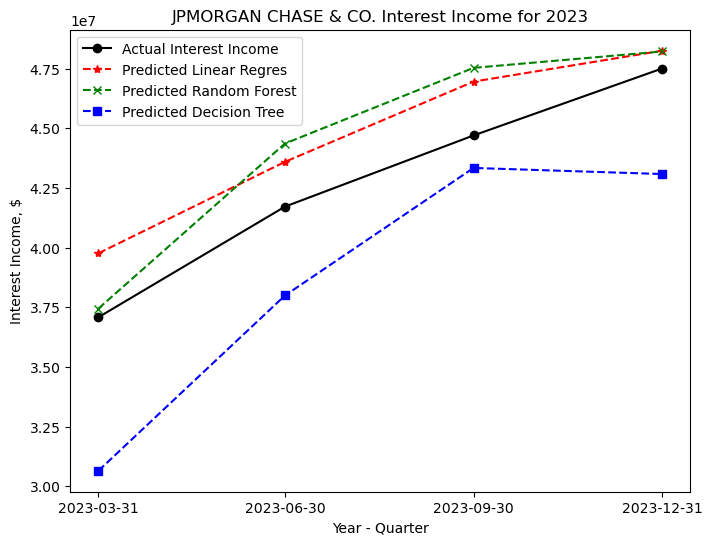

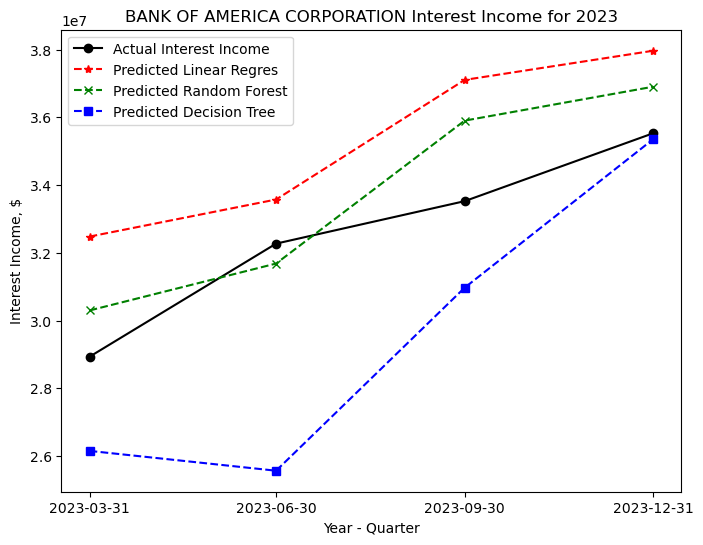

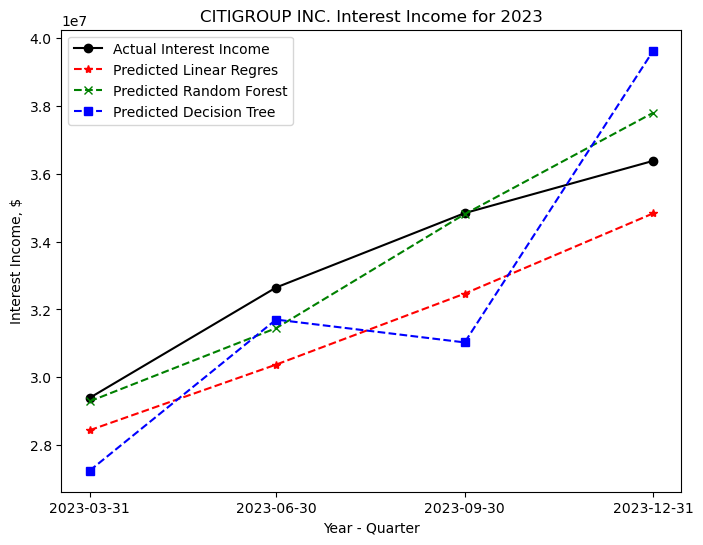

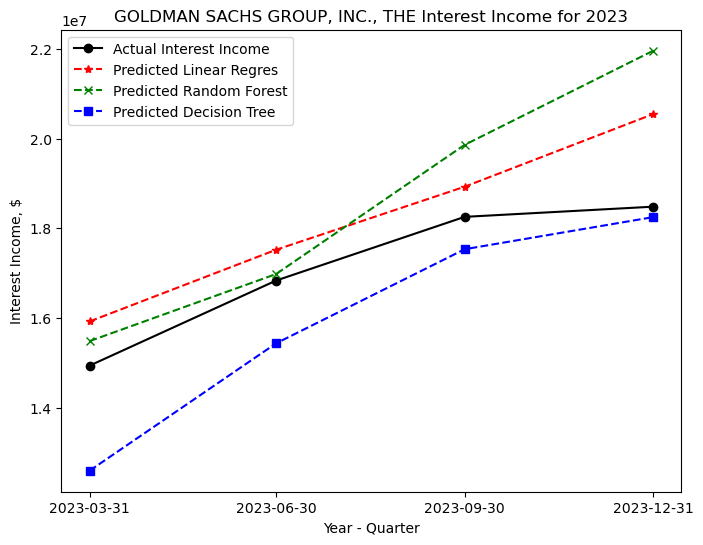

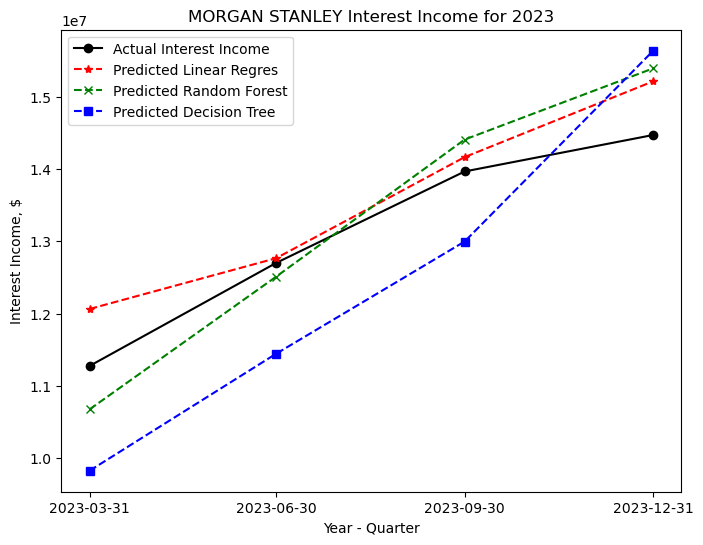

In [100]:
for bank in banks:
    plot_interest_income(q_df_ty, df5, bank)